In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

data_set = pd.read_csv('heart-disease.csv')
data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data_set= data_set.drop_duplicates()# Retrait des valeurs dupliquées
#Mis à l'échelle des données avec la méthode Robust scaling pour éviter l'impact des valeurs aberrantes
X = data_set.drop(columns='target')
y = data_set['target']

In [4]:
# Division de l'ensemble de données en données d'entrainement et en données de test
X_entrainement, X_test, y_entrainement, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
print(X_entrainement.shape)
print(X_test.shape)
print(y_entrainement.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_entrainement)
X_test_scaled = scaler.transform(X_test)
X_entrainement =  pd.DataFrame(X_train_scaled, columns=X_entrainement.columns)
X_test =  pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [7]:

# modèle de regréssion logistique 
logistic = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 intercept_scaling=1, max_iter=100, n_jobs=1,
 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
 verbose=0, warm_start=False)
logistic.fit(X_entrainement, y_entrainement)
print('Précision moyenne du modèle ( Regression logistique) : %f' % logistic.score(X_test, y_test))

Précision moyenne du modèle ( Regression logistique) : 0.868852


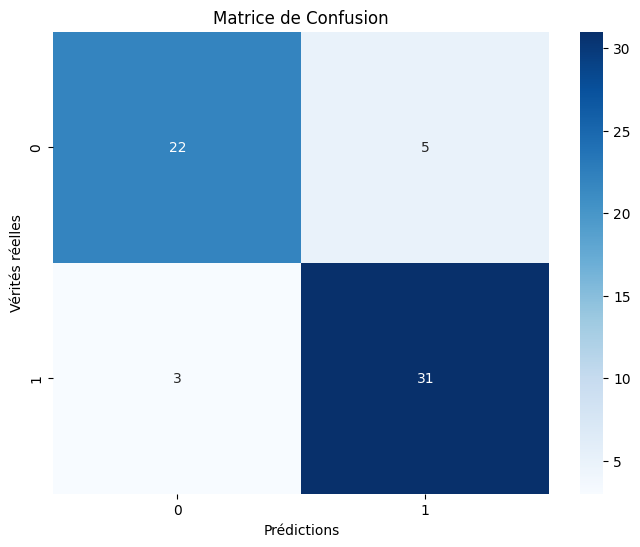

In [10]:
#Matrice de confusion
y_pred = logistic.predict(X_test)
matrice_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(matrice_confusion, annot=True, fmt='d', cmap='Blues')

plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérités réelles')
plt.show()


In [11]:
exactitude = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
rappel = recall_score(y_test,y_pred)
print(f" Exactitude : { exactitude *100: .2f}")
print(f" precision : { precision *100: .2f}")
print(f" rappel : { rappel*100: .2f}")


 Exactitude :  86.89
 precision :  86.11
 rappel :  91.18


In [7]:
# Probabilités de la classe positive (présence de maladie)
y_probs = logistic.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
print(f'AUC : {auc:.2f}')

AUC : 0.92


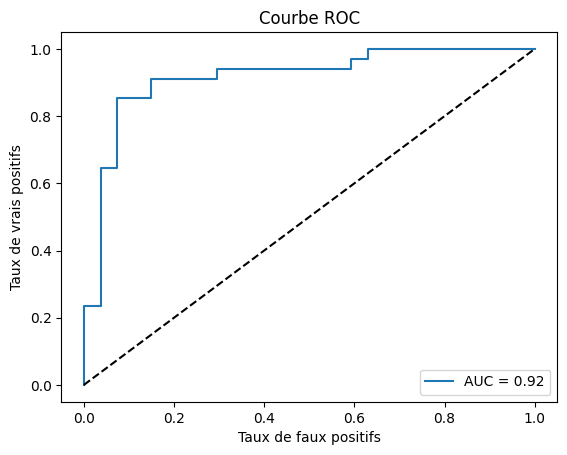

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Courbe aléatoire (ligne diagonale)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validation
scores = cross_val_score(logistic, X, y, cv=kf, scoring='accuracy')
# Print the scores and the average accuracy
print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))

Cross-validation scores: [0.85245902 0.7704918  0.86666667 0.81666667 0.85      ]
Average accuracy: 0.8312568306010928
